<a href="https://colab.research.google.com/github/saghar-trade/uci-adult-data-engineering/blob/main/ROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score, f1_score , roc_curve

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]
df=pd.read_csv(url,names=columns,on_bad_lines="skip")
df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df['income']=df['income'].apply(lambda x:x.strip() if isinstance(x, str) else x)

In [ ]:
df['income']=np.where(df['income']=='<=50K',0,1)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
x=df.drop('income', axis=1)
y=df.income

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#cat====>num
LE=LabelEncoder()
cat_cols=[
    "workclass", "education",
    "marital-status", "occupation", "relationship", "race", "sex",
     "native-country"

]
for col in cat_cols:
  x[col]=LE.fit_transform(x[col])


<Axes: xlabel='income'>

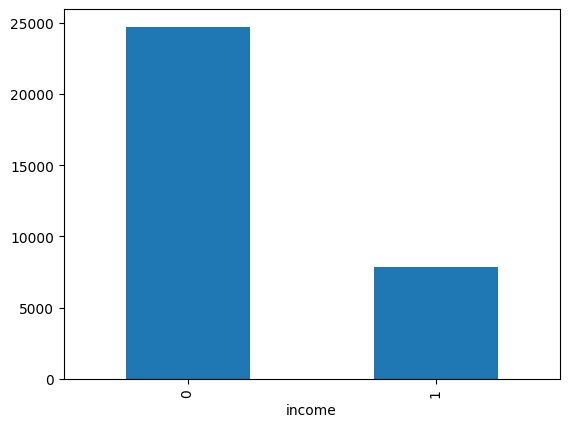

In [ ]:
y_value_count=y.value_counts()
y_value_count.plot(kind='bar')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25 ,random_state=42)

In [ ]:
rfc=RandomForestClassifier(n_estimators=200, verbose=0, max_depth=6)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [ ]:
y_pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)


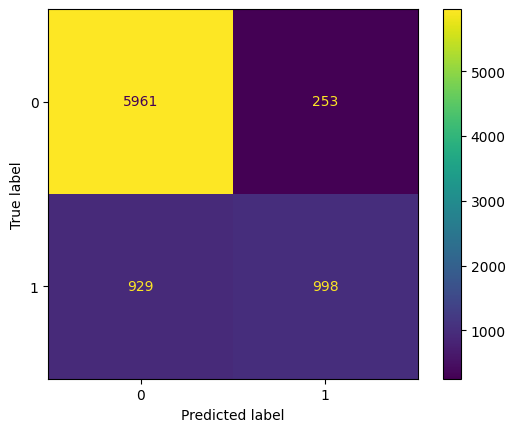

In [ ]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot();

In [ ]:
accuracy_score(y_test,y_pred)

0.8548089915243827

In [ ]:
f1_score(y_test,y_pred)

0.6280679672750157

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_xgb)

0.8764279572534087

In [ ]:
f1_score(y_test,y_pred_xgb)

0.7210205213533001

In [ ]:
roc_auc_score(y_test,y_pred)

np.float64(0.7385944806485981)

ROC AUC: 0.910086352710763


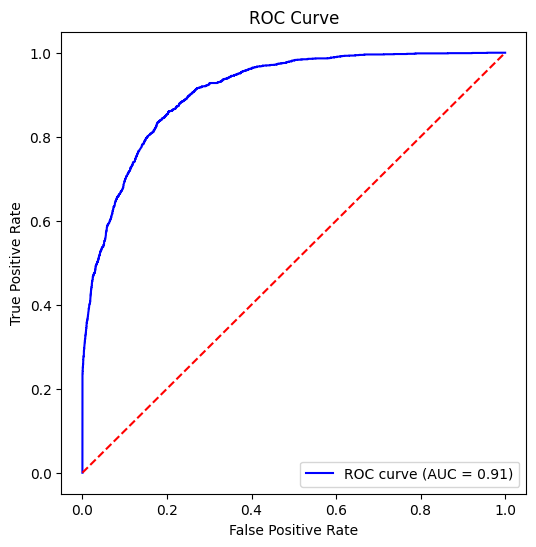

In [ ]:
y_proba = rfc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)


auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc_score)

# plot  ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

ROC AUC: 0.7473158939863098


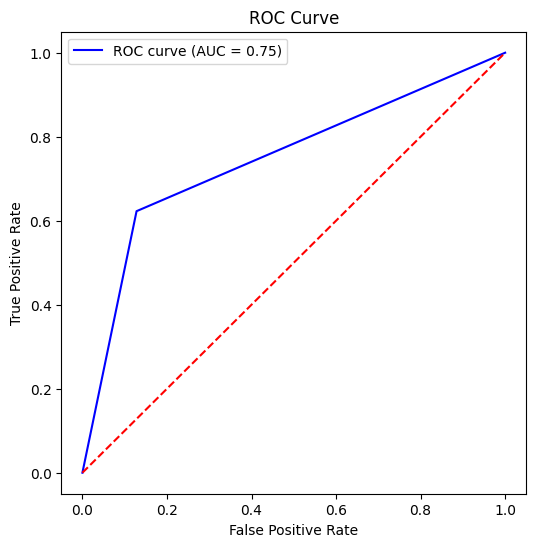

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
y_proba_dtc = dtc.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dtc, pos_label=1)


auc_score = roc_auc_score(y_test, y_proba_dtc)
print("ROC AUC:", auc_score)

# plot  ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()